# Departamento de vendas

## Importação das bibliotecas e base de dados

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

### Dados das vendas

In [5]:
sales_train_df = pd.read_csv('train.csv')

C:\Users\julio\AppData\Local\Temp\ipykernel_34844\1244316221.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  sales_train_df = pd.read_csv('train.csv')


In [6]:
sales_train_df.shape

(1017209, 9)

In [7]:
sales_train_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [9]:
#Verificando que temos os dias, 1 a 7, seg a dom
sales_train_df['DayOfWeek'].unique()

array([5, 4, 3, 2, 1, 7, 6], dtype=int64)

In [10]:
#Dois valores, loja aberta ou fechada
sales_train_df['Open'].unique()

array([1, 0], dtype=int64)

In [11]:
#Promoção ou não
sales_train_df['Promo'].unique()

array([1, 0], dtype=int64)

In [12]:
#Classificação quanto a feriados
sales_train_df['StateHoliday'].unique()

array(['0', 'a', 'b', 'c', 0], dtype=object)

In [13]:
#Feriado escolar ou não?
sales_train_df['SchoolHoliday'].unique()

array([1, 0], dtype=int64)

In [14]:
sales_train_df.tail()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1
1017208,1115,2,2013-01-01,0,0,0,0,a,1


In [15]:
sales_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [16]:
sales_train_df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


### Dados das lojas

In [19]:
store_info_df = pd.read_csv('store.csv')

In [21]:
#Temos 1115 lojas, digamos que filiais
store_info_df.shape

(1115, 10)

In [22]:
store_info_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [23]:
store_info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [24]:
store_info_df.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


## Exploração dos dados

### Dados das vendas

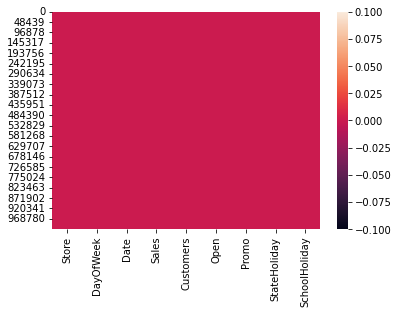

In [25]:
#Confirmando graficamente que não temos dados nulos, como visto ateriormente
sns.heatmap(sales_train_df.isnull());

In [27]:
#Quantidade de dados nulos por coluna
sales_train_df.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

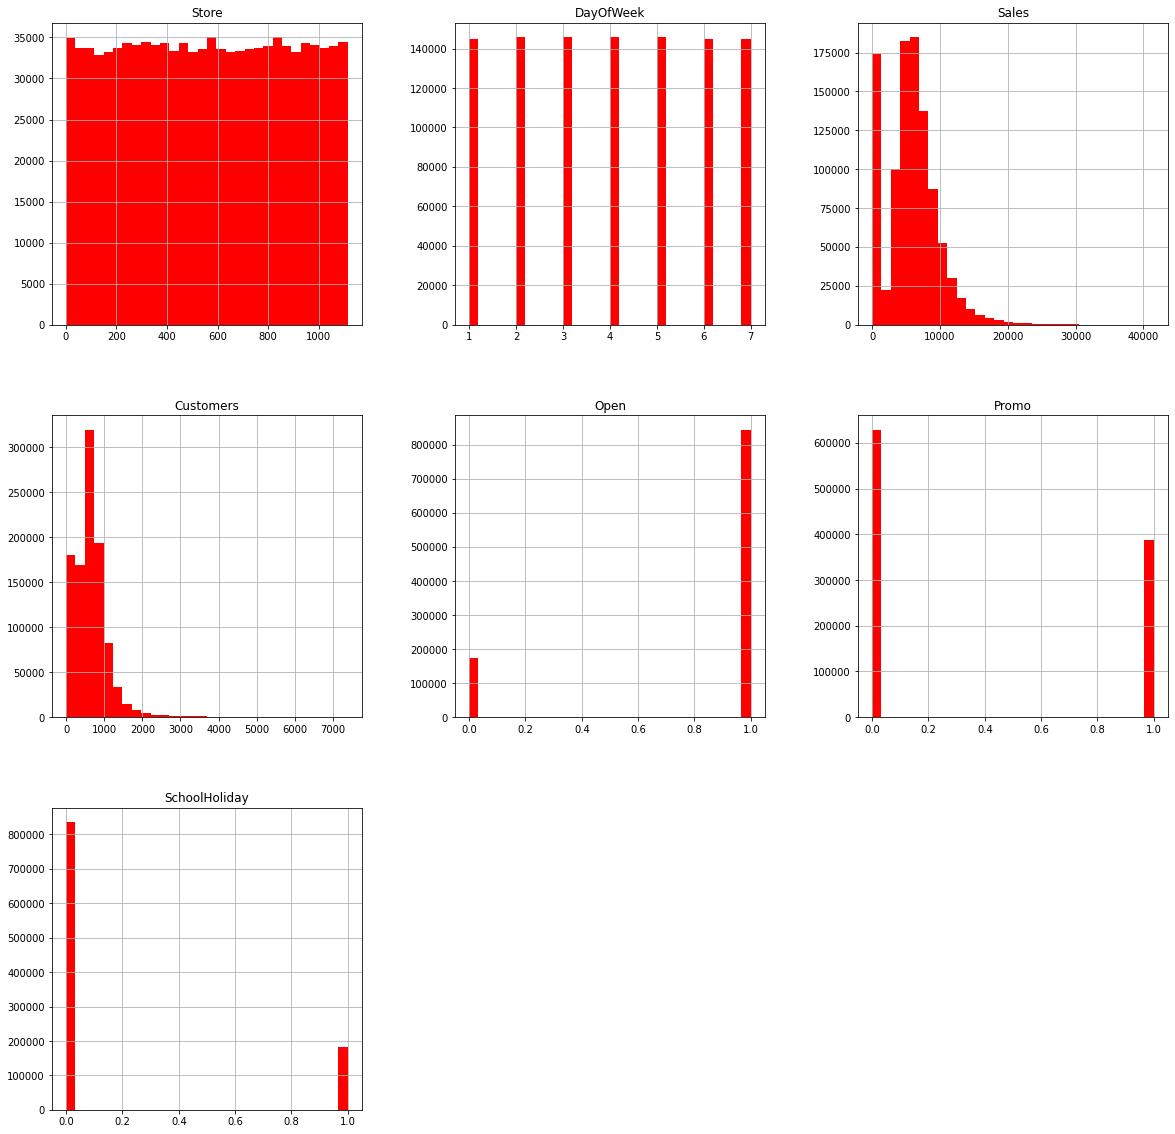

In [29]:
#Histograma para visualização das colunas
sales_train_df.hist(bins = 30, figsize=(20, 20), color = 'r');

1. Como o Store é apenas para identificação das lojas, teremos uma distriibuição uniforme, não é um atributo à ser levado em consideração nas análises.
2. Quanto aos dias da semana, podemos observar que os dados são bem distribuídos entre todos os dias, banco bem balanceado
3. Observando gráfico de vendas, podemos observar que boa parte está concentrada até mais ou menos 6mil euros
4. Quantos aos clientes, podemos observar que temos em média 600 clientes/dia
5. Quanto ao atributo "open" podemos observar que na maioria do tempos as lojas estavam abertas
6. Em relação à promoções, vemos que tinhámos promoções ativas em cerca de 40% do tempo em que as lojas estavam abertas
7. Cerca de 18-20% dos dias com as lojas abertas, tínhamos um "feriado escolar"

In [30]:
#Valor máximo de clientes em um único dia
sales_train_df['Customers'].max()

7388

In [31]:
#Criando dois DFs, um para dias com a lojas abertas, e outro com as lojas fechadas, baseado na coluna Open (Loja Aberta: 1; Loja Fechada: 0)
closed_train_df = sales_train_df[sales_train_df['Open'] == 0]
open_train_df = sales_train_df[sales_train_df['Open'] == 1]

In [32]:
print('Total = ', len(sales_train_df))
print('Número de lojas/dias fechado = ', len(closed_train_df))
print('Número de lojas/dias aberto = ', len(open_train_df))

Total =  1017209
Número de lojas/dias fechado =  172817
Número de lojas/dias aberto =  844392


Obs.: Esses dados acima contém informação de todas as 1115 lojas da franquia,então para ter uma média de dias abertos/fechados, precisaríamos dividir esse valor de dias pelas 1115 lojas

In [36]:
print('Total = ', len(sales_train_df))
print('Número de lojas/dias fechado = ', len(closed_train_df)/len(store_info_df))
print('Número de lojas/dias aberto = ', len(open_train_df)/len(store_info_df))

Total =  1017209
Número de lojas/dias fechado =  154.99282511210762
Número de lojas/dias aberto =  757.3022421524664


In [37]:
closed_train_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
291,292,5,2015-07-31,0,0,0,1,0,1
875,876,5,2015-07-31,0,0,0,1,0,1
1406,292,4,2015-07-30,0,0,0,1,0,1
1990,876,4,2015-07-30,0,0,0,1,0,1
2521,292,3,2015-07-29,0,0,0,1,0,1


Como as lojas estavam fechadas nesses dias, não é legal utilizarmos em nossas análises, pois poderia influenciar em por exemplo, médias, e/ou outras diversas análises sobre vendas e clientes (loja fechada = sem vendas e sem clientes) 

In [38]:
#Atualizando DF com informações apenas de dias apertos
sales_train_df = sales_train_df[sales_train_df['Open'] == 1]

In [39]:
sales_train_df.shape

(844392, 9)

In [40]:
sales_train_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1016776,682,2,2013-01-01,3375,566,1,0,a,1
1016827,733,2,2013-01-01,10765,2377,1,0,a,1
1016863,769,2,2013-01-01,5035,1248,1,0,a,1
1017042,948,2,2013-01-01,4491,1039,1,0,a,1


In [41]:
#Como agora temos apenas dados das lojas quando abertas, a coluna "Open" torna-se indiferente, pois sempre será 1, podemos excluí-la do nosso DF 
sales_train_df.drop(['Open'], axis = 1, inplace=True)

In [42]:
sales_train_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,0,1
1,2,5,2015-07-31,6064,625,1,0,1
2,3,5,2015-07-31,8314,821,1,0,1
3,4,5,2015-07-31,13995,1498,1,0,1
4,5,5,2015-07-31,4822,559,1,0,1


In [43]:
sales_train_df.describe()

,Store,DayOfWeek,Sales,Customers,Promo,SchoolHoliday
count,844392.000000,844392.000000,844392.000000,844392.000000,844392.000000,844392.000000
mean,558.422920,3.520361,6955.514291,762.728395,0.446352,0.193580
std,321.731914,1.723689,3104.214680,401.227674,0.497114,0.395103
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,280.000000,2.000000,4859.000000,519.000000,0.000000,0.000000
50%,558.000000,3.000000,6369.000000,676.000000,0.000000,0.000000
75%,837.000000,5.000000,8360.000000,893.000000,1.000000,0.000000
max,1115.000000,7.000000,41551.000000,7388.000000,1.000000,1.000000


Se comparar-mos com o "describe" do DF inicial, podemos observar que a média de vendas e clientes aumentou, isso se dá pelo fato de termos exclúido do DF os dias fechados, consequentemente, os dias com vendas e clientes zerados!!! <b>Agora temos dados mais corretos e precisos para nossas análises.</b>

### Dados das lojas

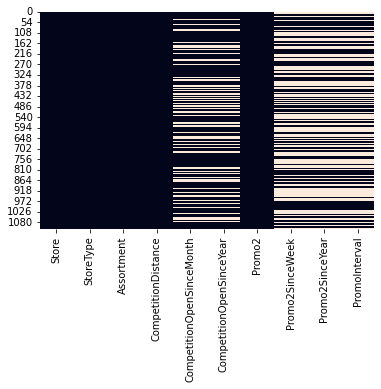

In [44]:
#Mapa para dados nulos
sns.heatmap(store_info_df.isnull(), cbar=False);

In [45]:
#Dados nulos na coluna CompetitionDistance (distância do competidor mais próximo)
store_info_df[store_info_df['CompetitionDistance'].isnull()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
290,291,d,a,NaN,NaN,NaN,0,NaN,NaN,NaN
621,622,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN
878,879,d,a,NaN,NaN,NaN,1,5.0,2013.0,"Feb,May,Aug,Nov"


In [46]:
#Dados nulos na coluna CompetitionOpenSinceMonth (competidor próximo aberto desde o mês...)
store_info_df[store_info_df['CompetitionOpenSinceMonth'].isnull()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
11,12,a,c,1070.0,NaN,NaN,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
12,13,d,a,310.0,NaN,NaN,1,45.0,2009.0,"Feb,May,Aug,Nov"
15,16,a,c,3270.0,NaN,NaN,0,NaN,NaN,NaN
18,19,a,c,3240.0,NaN,NaN,1,22.0,2011.0,"Mar,Jun,Sept,Dec"
21,22,a,a,1040.0,NaN,NaN,1,22.0,2012.0,"Jan,Apr,Jul,Oct"
...,...,...,...,...,...,...,...,...,...,...
1095,1096,a,c,1130.0,NaN,NaN,1,10.0,2014.0,"Mar,Jun,Sept,Dec"
1099,1100,a,a,540.0,NaN,NaN,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [47]:
#Dados nulos na coluna CompetitionOpenSinceYear (competidor próximo aberto desde o ano...)
store_info_df[store_info_df['CompetitionOpenSinceYear'].isnull()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
11,12,a,c,1070.0,NaN,NaN,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
12,13,d,a,310.0,NaN,NaN,1,45.0,2009.0,"Feb,May,Aug,Nov"
15,16,a,c,3270.0,NaN,NaN,0,NaN,NaN,NaN
18,19,a,c,3240.0,NaN,NaN,1,22.0,2011.0,"Mar,Jun,Sept,Dec"
21,22,a,a,1040.0,NaN,NaN,1,22.0,2012.0,"Jan,Apr,Jul,Oct"
...,...,...,...,...,...,...,...,...,...,...
1095,1096,a,c,1130.0,NaN,NaN,1,10.0,2014.0,"Mar,Jun,Sept,Dec"
1099,1100,a,a,540.0,NaN,NaN,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


Quantidade de linhas nulas no mês é igual no ano, e todos no mesmo índice! 

In [48]:
#Lojas que não estão participando de uma promoção adicional
store_info_df[store_info_df['Promo2'] == 0]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
5,6,a,a,310.0,12.0,2013.0,0,NaN,NaN,NaN
6,7,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1107,1108,a,a,540.0,4.0,2004.0,0,NaN,NaN,NaN
1109,1110,c,c,900.0,9.0,2010.0,0,NaN,NaN,NaN
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN


Podemos observar que em 544 lojas, não temos a aplicação dessas promoções adicionais (Promo2 = 0), então, consequentemente as colunas seguintes (Promo2SinceWeek, Promo2SinceYear e PromoInterval) estarão vazias pois têm referências com ela! <b>Precisamos tratar esses dados!</b>

In [49]:
#Atribuindo 0 para todos esses atributos nulos citados acima
str_cols = ['Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval',
            'CompetitionOpenSinceYear', 'CompetitionOpenSinceMonth']
for str in str_cols:
  store_info_df[str].fillna(0, inplace=True)  #fillna para preencher os valores faltantes

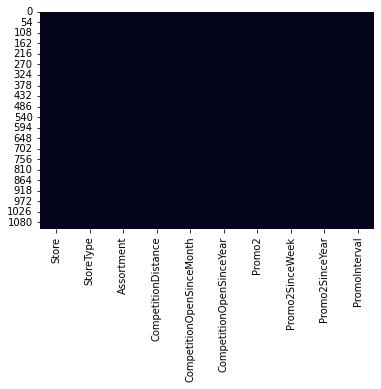

In [50]:
#Verificando se realmente os valores nulos foram preenchidos
sns.heatmap(store_info_df.isnull(), cbar = False);

Agora, sabemos que ainda temos alguns atributos nulos na coluna de CompetitionDistance. Como nesse caso temos valores numéricos, <b>podemos substituir pela média</b>, que não irá influenciar em nossas análises!

In [51]:
store_info_df['CompetitionDistance'].fillna(store_info_df['CompetitionDistance'].mean(), inplace = True)

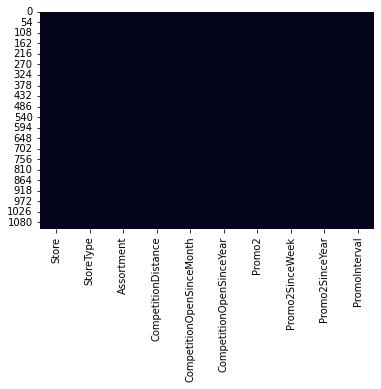

In [52]:
sns.heatmap(store_info_df.isnull(), cbar = False);

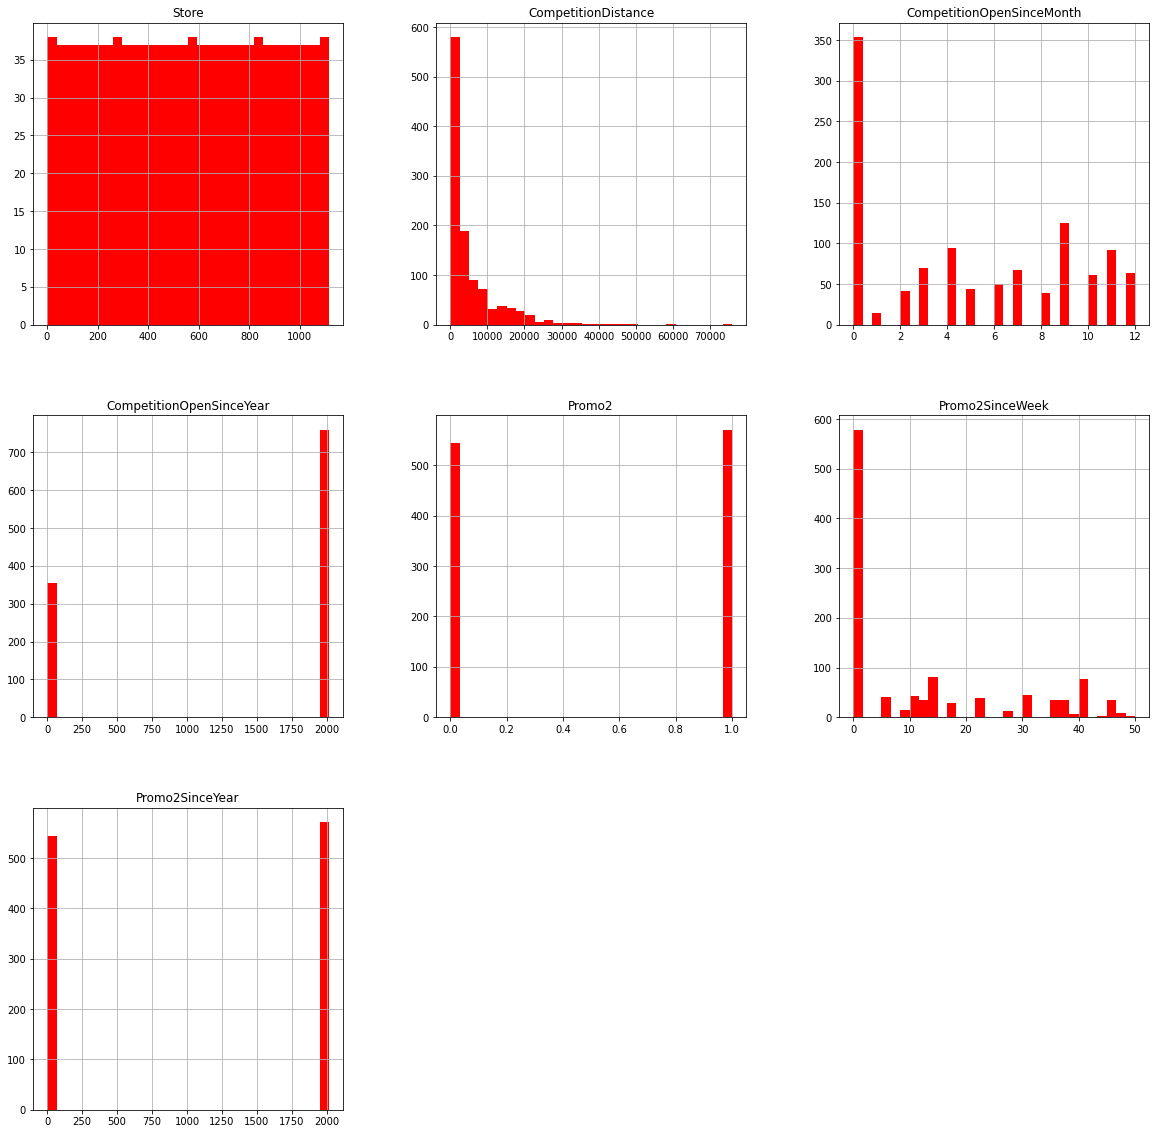

In [53]:
#Histogramas para visualização dos dados tratados
store_info_df.hist(bins = 30, figsize=(20,20), color = 'r');

1. Store = ID da loja. Como concluído anteriormente, é indiferente para nossa análise.
2. Maior concentração de competidores estão mais próximos (raio de 3km mais ou menos)
3. Cerca de 50% das lojas participam de promoções adicionais (Promo2)

### Combinação dos Dados (vendas + lojas)

In [54]:
sales_train_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,0,1
1,2,5,2015-07-31,6064,625,1,0,1
2,3,5,2015-07-31,8314,821,1,0,1
3,4,5,2015-07-31,13995,1498,1,0,1
4,5,5,2015-07-31,4822,559,1,0,1


In [55]:
store_info_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,0.0,0.0,0
4,5,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0


Uma coluna em comum para essa união é a Store (ID da Loja)

In [57]:
#Ligação dos DF baseado na coluna Store, através do método merge do Pandas
sales_train_all_df = pd.merge(sales_train_df, store_info_df, how = 'inner', on = 'Store')

#how = inner -> usa a interseção de chaves de ambos os quadros, semelhante a uma junção interna do SQL; 
#Preservar a ordem das teclas esquerdas.

In [58]:
sales_train_all_df.shape

(844392, 17)

In [59]:
sales_train_all_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,1,4,2015-07-30,5020,546,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
2,1,3,2015-07-29,4782,523,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
3,1,2,2015-07-28,5011,560,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
4,1,1,2015-07-27,6102,612,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0


Agora, vamos gerar uma Matriz de Correlação, para identificar ou não, alguma forte relação entre os dados

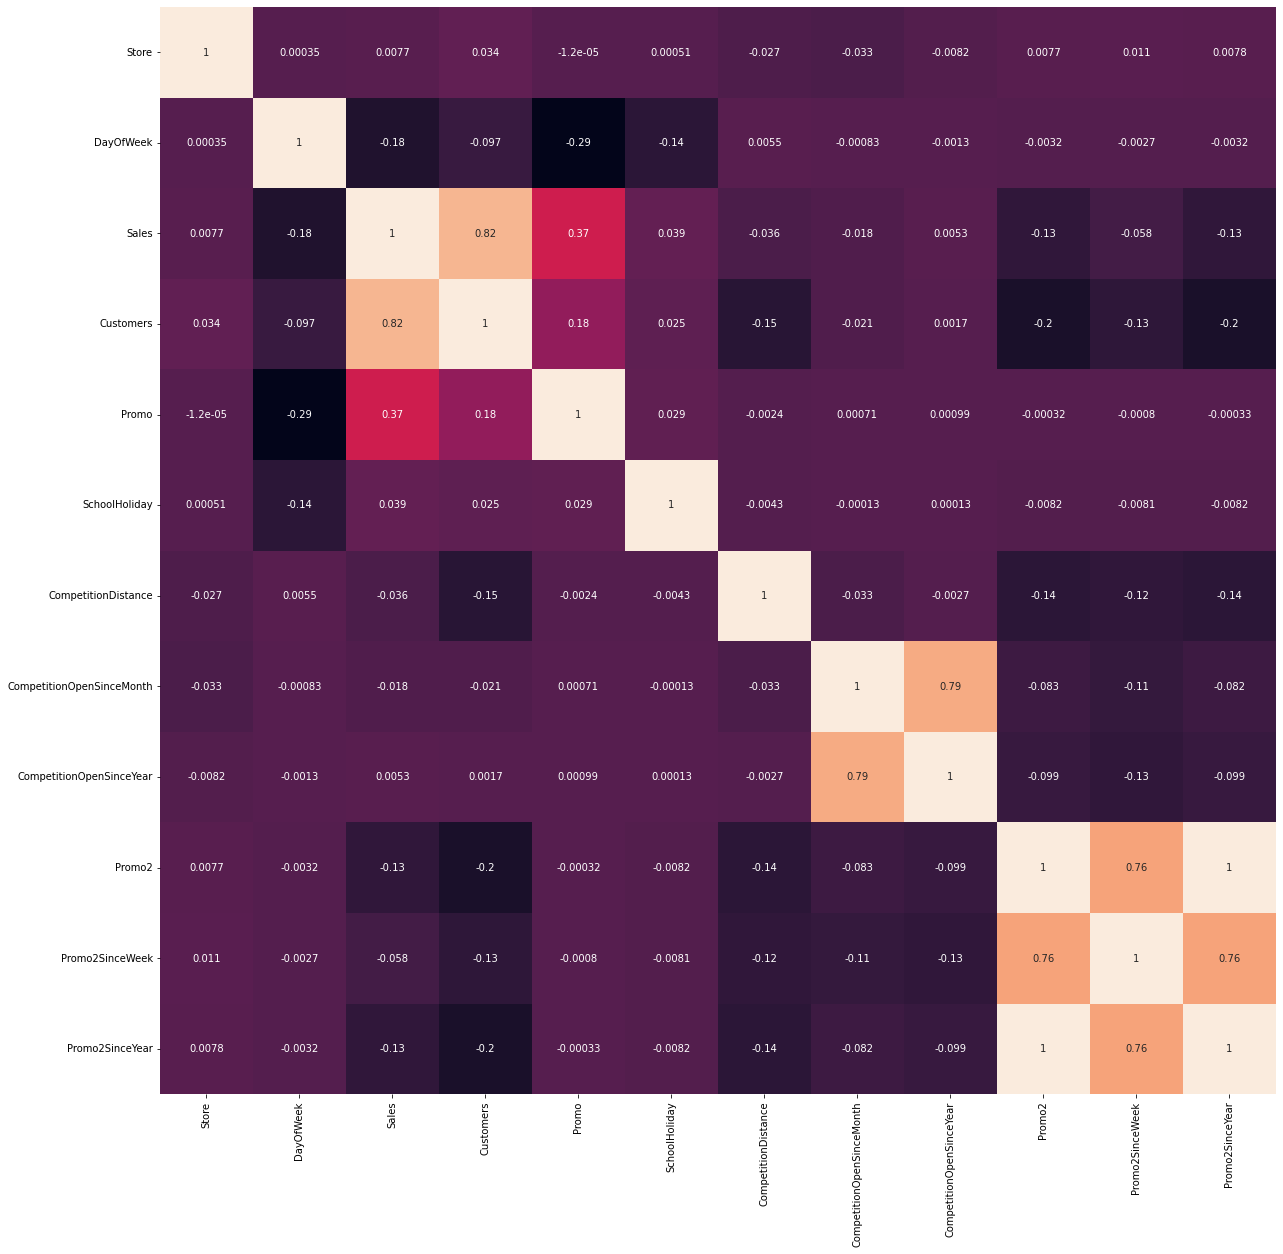

In [61]:
correlations = sales_train_all_df.corr()
f, ax = plt.subplots(figsize=(20,20))
sns.heatmap(correlations, annot = True, cbar=False);

In [62]:
#"ranking" de correlações quanto à um atributo especifico (no caso, sales)
correlations = sales_train_all_df.corr()['Sales'].sort_values()
correlations

DayOfWeek                   -0.178736
Promo2SinceYear             -0.127621
Promo2                      -0.127596
Promo2SinceWeek             -0.058476
CompetitionDistance         -0.036343
CompetitionOpenSinceMonth   -0.018370
CompetitionOpenSinceYear     0.005266
Store                        0.007710
SchoolHoliday                0.038617
Promo                        0.368145
Customers                    0.823597
Sales                        1.000000
Name: Sales, dtype: float64

Vamos gerar mais alguns gráficos para mais análises!!!

In [63]:
#Criação de uma nova coluna de Ano! Para isso, vamos extrair o ano com o atributo DatatimeIndex do Pandas da coluna Date
sales_train_all_df['Year'] = pd.DatetimeIndex(sales_train_all_df['Date']).year

In [64]:
sales_train_all_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year
0,1,5,2015-07-31,5263,555,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015
1,1,4,2015-07-30,5020,546,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015
2,1,3,2015-07-29,4782,523,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015
3,1,2,2015-07-28,5011,560,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015
4,1,1,2015-07-27,6102,612,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015


In [65]:
#Mesmo processo para criarmos atributor de dia e mês
sales_train_all_df['Month'] = pd.DatetimeIndex(sales_train_all_df['Date']).month
sales_train_all_df['Day'] = pd.DatetimeIndex(sales_train_all_df['Date']).day

In [66]:
sales_train_all_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day
0,1,5,2015-07-31,5263,555,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,31
1,1,4,2015-07-30,5020,546,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,30
2,1,3,2015-07-29,4782,523,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,29
3,1,2,2015-07-28,5011,560,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,28
4,1,1,2015-07-27,6102,612,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,27


Text(0.5, 1.0, 'Média de vendas por mês')

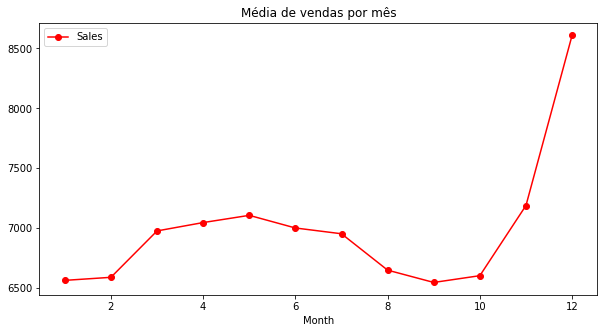

In [69]:
#Gráfico para gerar a média de vendas por mês
axis = sales_train_all_df.groupby('Month')[['Sales']].mean().plot(figsize = (10,5), marker = 'o', color = 'r')
axis.set_title('Média de vendas por mês')

Podemos observar que os melhores meses das lojas são Novembro e Dezembro, com uma média de vendas maior (dezembro muito superior)

Text(0.5, 1.0, 'Média de clientes por mês')

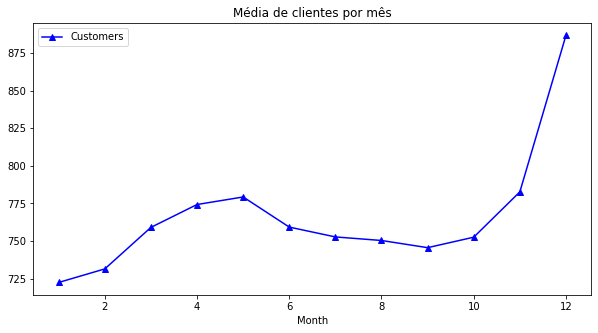

In [70]:
#Gráfico para a média de clientes por mês (mesmo método utilizado para média de vendas)
axis = sales_train_all_df.groupby('Month')[['Customers']].mean().plot(figsize = (10,5), marker = '^', color = 'b')
axis.set_title('Média de clientes por mês')

O comportamento se repete, com os meses de novembro e dezembro se destacando, com dezembro bem mais na frente

Text(0.5, 1.0, 'Média de vendas por dia')

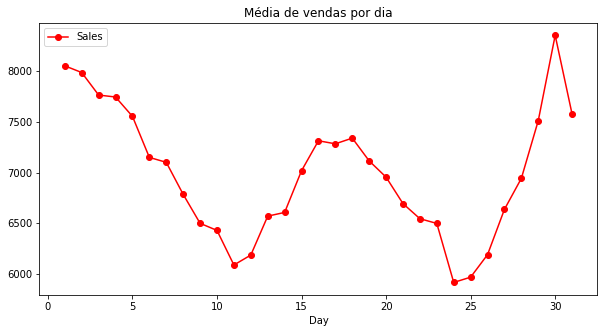

In [73]:
#Média de vendas por dia (será que existe algum dia do mês que se destaca?)
axis = sales_train_all_df.groupby('Day')[['Sales']].mean().plot(figsize = (10,5), marker = 'o', color = 'r')
axis.set_title('Média de vendas por dia')

As vendas se concentram no começo e no fim do mês (geralmente é um período em que as pessoas recebem seus pagamentos, pode-se justificar por isso)

Text(0.5, 1.0, 'Média de clientes por dia')

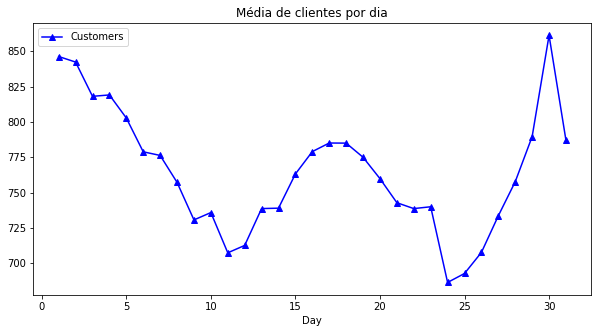

In [74]:
#Média de CLientes por dia
axis = sales_train_all_df.groupby('Day')[['Customers']].mean().plot(figsize = (10,5), marker = '^', color = 'b')
axis.set_title('Média de clientes por dia')

Text(0.5, 1.0, 'Média de vendas por dia da semana')

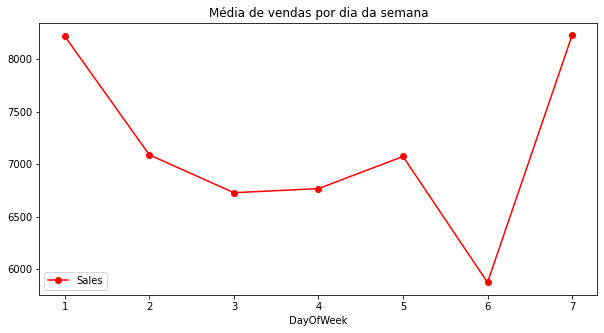

In [75]:
#Média de vendas por dia da semana
axis = sales_train_all_df.groupby('DayOfWeek')[['Sales']].mean().plot(figsize = (10,5), marker = 'o', color = 'r')
axis.set_title('Média de vendas por dia da semana')

Segunda e Domingo são os dias que mais vendem! Sábado é o pior dia quanto a vendas

Text(0.5, 1.0, 'Média de clientes por dia da semana')

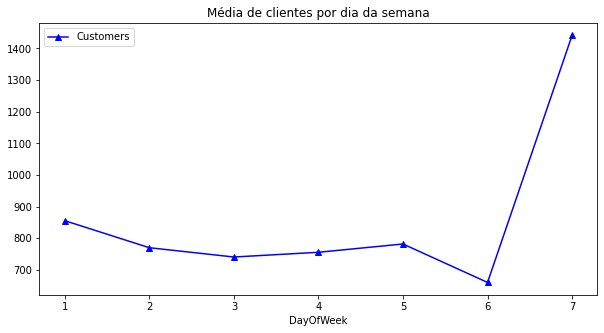

In [76]:
#Média de clientes por dia da semana
axis = sales_train_all_df.groupby('DayOfWeek')[['Customers']].mean().plot(figsize = (10,5), marker = '^', color = 'b')
axis.set_title('Média de clientes por dia da semana')

Text(0.5, 1.0, 'Vendas por Data x Tipo de Loja')

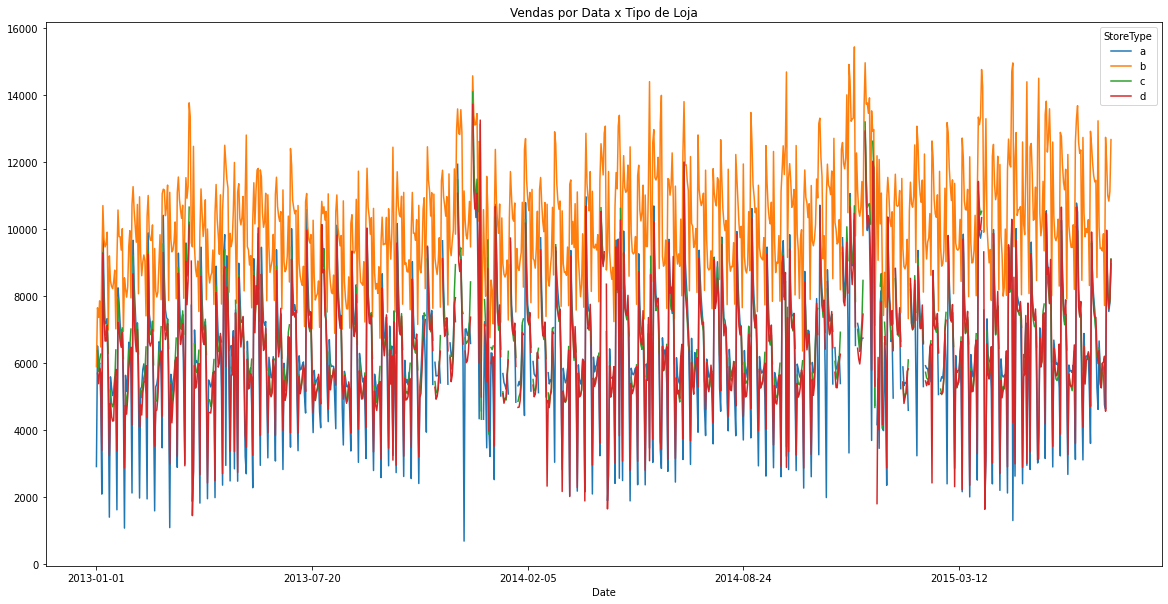

In [78]:
#Agrupamento por mais de um atributo, neste caso, Date x StoryTipe (tipo de loja) - ATRIBUTO CATEGÓRICO
fig, ax = plt.subplots(figsize = (20,10))
sales_train_all_df.groupby(['Date', 'StoreType']).mean()['Sales'].unstack().plot(ax = ax) #unstack para separar os dados baseado no parâmetro, dividindo em cores diferentes
plt.title('Vendas por Data x Tipo de Loja')

1. Podemos observar que a loja ade tipo B possui uma maior média de vendas que as outras lojas
2. O tipo A apresenta uma menor média nas vendas

Será que as promoções afetam meu número de clientes e vendas? Vejamos

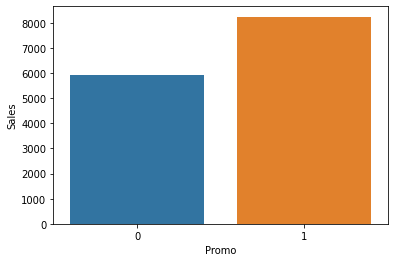

In [79]:
#Agrupando as vendas com e sem promoção
sns.barplot(x = 'Promo', y = 'Sales', data = sales_train_all_df);

Podemos observar que quando temos <b>promoções</b> na loja, o <b>número de vendas é maior<b>!!!

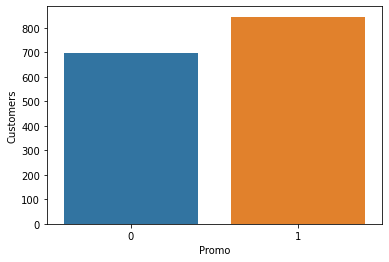

In [80]:
#Verificando se o padrão é seguido quanto a clientes
sns.barplot(x = 'Promo', y = 'Customers', data = sales_train_all_df);

Temos um aumento médio de quase 100 clientes por dia quando temos promoções em nossas lojas!!!

## Treinamento do modelo - parte 1

In [83]:
from prophet import Prophet

c:\Users\julio\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


In [86]:
#Função para previsão de vendas (parâmetros: id, vendas e periodos)

def sales_prediction(store_id, sales_df, periods):
  #Coluna STORE será nosso parâmetro store_id
  sales_df = sales_df[sales_df['Store'] == store_id]
  #Renomeando as colunas de Data e Vendas para melhor entendimento do Prophet (Date = ds | Sales = y)
  sales_df = sales_df[['Date', 'Sales']].rename(columns = {'Date': 'ds', 'Sales': 'y'})
  #Ordenar dados pela data (dados precisam estar coordenados para uso do Prophet)
  sales_df = sales_df.sort_values(by = 'ds')

  #Treinando modelo
  model = Prophet()
  model.fit(sales_df)
  #Variável future para atribuir dados de previsões
  future = model.make_future_dataframe(periods = periods)
  forecast = model.predict(future) #Forecast = Previsões
  #Plot com os dados da previsão
  figure1 = model.plot(forecast, xlabel = 'Data', ylabel = 'Vendas')
  #Dados sobre a série temporal
  figure2 = model.plot_components(forecast)

  return sales_df, forecast

21:16:31 - cmdstanpy - INFO - Chain [1] start processing
21:16:32 - cmdstanpy - INFO - Chain [1] done processing


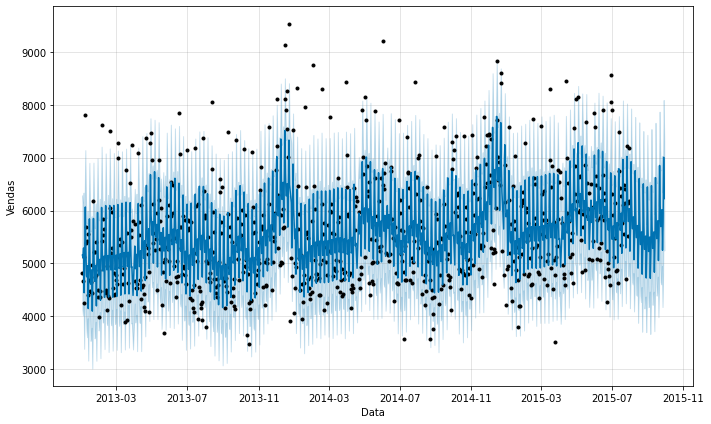

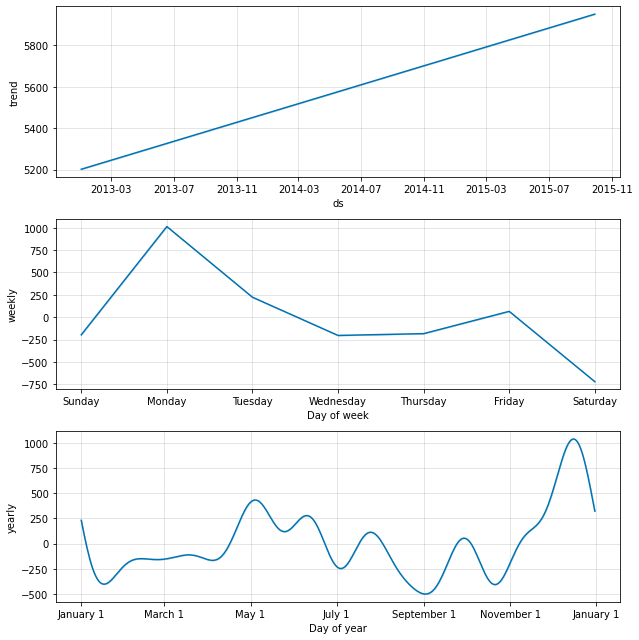

In [87]:
#Criando 2 dfs, pois retornamos 2 dfs na minha função da previsão
df_origin, df_prediction = sales_prediction(10, sales_train_all_df, 60)
#parâmetros sales_prediction: loja nº 10 | base de dados completa (2013 à 2015) | previsão para 60 dias à frente

In [88]:
#Entendimento dos DFs
df_origin.shape, df_prediction.shape

((784, 2), (844, 19))

1. No primeiro DF, ele mantem os 784 registros iniciais da loja 10

2. Já no segundo, temos 60 registros a mais que no DF inicial, isso porque, treinamos nosso modelo para prever as vendas dos 60 dias posteriores, o que justifica o aumento exato desses 60 registros!

In [89]:
df_prediction.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2013-01-02,5202.122226,4125.447363,6290.629174,5202.122226,5202.122226,-44.088866,-44.088866,-44.088866,-203.266252,-203.266252,-203.266252,159.177386,159.177386,159.177386,0.0,0.0,0.0,5158.033360
1,2013-01-03,5202.869012,4018.233889,6155.319693,5202.869012,5202.869012,-93.159459,-93.159459,-93.159459,-183.232039,-183.232039,-183.232039,90.072580,90.072580,90.072580,0.0,0.0,0.0,5109.709553
2,2013-01-04,5203.615798,4276.383361,6339.743691,5203.615798,5203.615798,89.672039,89.672039,89.672039,65.770528,65.770528,65.770528,23.901510,23.901510,23.901510,0.0,0.0,0.0,5293.287837
3,2013-01-05,5204.362584,3385.793173,5514.183782,5204.362584,5204.362584,-758.045067,-758.045067,-758.045067,-719.337136,-719.337136,-719.337136,-38.707931,-38.707931,-38.707931,0.0,0.0,0.0,4446.317517
4,2013-01-07,5205.856156,5019.323168,7141.766524,5205.856156,5205.856156,861.689991,861.689991,861.689991,1012.823883,1012.823883,1012.823883,-151.133892,-151.133892,-151.133892,0.0,0.0,0.0,6067.546147


In [90]:
#Visualizando ultimos 60 dados, ou seja, os dados previstos pelo Prophet
df_prediction.tail(60)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
784,2015-08-01,5906.224180,4152.803010,6370.788922,5906.224180,5906.224180,-674.091784,-674.091784,-674.091784,-719.337136,-719.337136,-719.337136,45.245353,45.245353,45.245353,0.0,0.0,0.0,5232.132397
785,2015-08-02,5906.972870,4686.357928,6707.597868,5906.972870,5906.972870,-171.324951,-171.324951,-171.324951,-196.247268,-196.247268,-196.247268,24.922317,24.922317,24.922317,0.0,0.0,0.0,5735.647920
786,2015-08-03,5907.721561,5870.802118,7929.818584,5907.721561,5907.721561,1015.663105,1015.663105,1015.663105,1012.823883,1012.823883,1012.823883,2.839222,2.839222,2.839222,0.0,0.0,0.0,6923.384666
787,2015-08-04,5908.470251,5031.198547,7187.181299,5908.470251,5908.470251,202.844269,202.844269,202.844269,223.488283,223.488283,223.488283,-20.644015,-20.644015,-20.644015,0.0,0.0,0.0,6111.314519
788,2015-08-05,5909.218941,4645.288345,6760.933644,5909.218941,5909.218941,-248.436906,-248.436906,-248.436906,-203.266252,-203.266252,-203.266252,-45.170654,-45.170654,-45.170654,0.0,0.0,0.0,5660.782035
789,2015-08-06,5909.967631,4603.983276,6704.197259,5909.967631,5909.967631,-253.627956,-253.627956,-253.627956,-183.232039,-183.232039,-183.232039,-70.395917,-70.395917,-70.395917,0.0,0.0,0.0,5656.339675
790,2015-08-07,5910.716321,4819.406018,6882.430617,5910.716321,5910.716321,-30.224313,-30.224313,-30.224313,65.770528,65.770528,65.770528,-95.994842,-95.994842,-95.994842,0.0,0.0,0.0,5880.492008
791,2015-08-08,5911.465011,4092.859998,6153.557483,5911.465011,5911.465022,-841.006145,-841.006145,-841.006145,-719.337136,-719.337136,-719.337136,-121.669009,-121.669009,-121.669009,0.0,0.0,0.0,5070.458866
792,2015-08-09,5912.213701,4435.464670,6580.803003,5912.213701,5912.213741,-343.399245,-343.399245,-343.399245,-196.247268,-196.247268,-196.247268,-147.151977,-147.151977,-147.151977,0.0,0.0,0.0,5568.814456
793,2015-08-10,5912.962391,5707.861348,7767.079762,5912.962382,5912.962462,840.610591,840.610591,840.610591,1012.823883,1012.823883,1012.823883,-172.213292,-172.213292,-172.213292,0.0,0.0,0.0,6753.572983


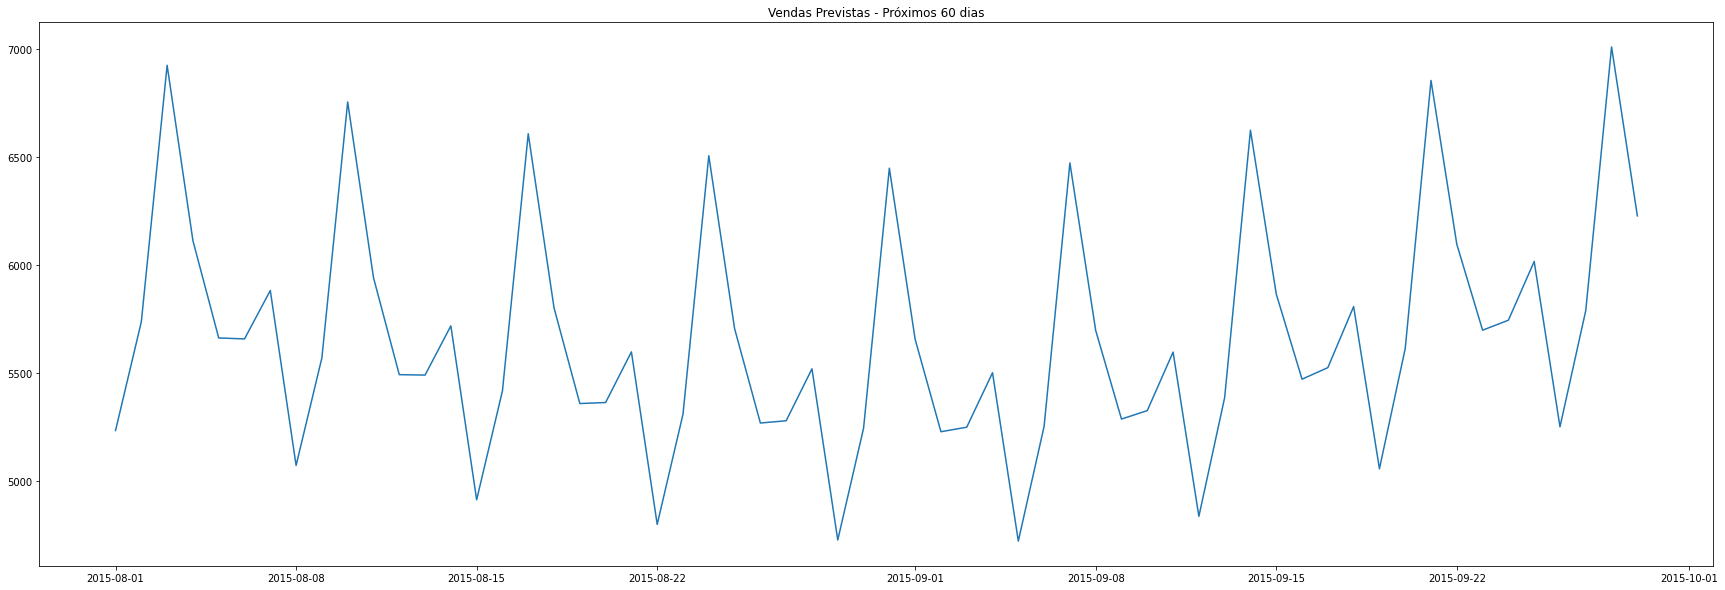

In [95]:
#Visualizando valores previstos

df_plot = df_prediction.tail(60)
plt.figure(figsize=(30,10))
plt.plot(df_plot['ds'], df_plot['yhat'])
plt.title('Vendas Previstas - Próximos 60 dias')
plt.show()

In [91]:
#Salvando as previsões em um arquivo
df_prediction.tail(60).to_csv('previsoes_vendas.csv')

In [ ]:
df_origin.tail()

,ds,y
7040,2015-07-27,7212
7039,2015-07-28,6140
7038,2015-07-29,5524
7037,2015-07-30,6186
7036,2015-07-31,7185


## Treinamento do modelo - parte 2

Como passar informações de feriados para o Prophet???
Utilizaremos dados que já temos em nossa base de dados, nos atributor StateHoliday e SchoolHoliday

   - StateHoliday: Normalmente todas as lojas estão fechadas nesses feriados. As escolas estão fechadas nesses feriados e nos finais de semana. 
      - Legenda do Atributo: a = public holiday, b = Páscoa, c = Natal, 0 = Nenhum feriado      
   - SchoolHoliday: indica se a loja foi afetada pelo feriado escolar
  






É importante passar essas informações de feriados para o algoritmo, pois, por exemplo, na Black Friday, a previsão poderia considerar vendas fora do padrão (outlier), entretanto, com a informação do evento passado, ele justificará esse aumento nas vendas, sem interpretar como um valor simplemente atípico.

In [96]:
def sales_prediction(store_id, sales_df, holidays, periods):
  sales_df = sales_df[sales_df['Store'] == store_id]
  sales_df = sales_df[['Date', 'Sales']].rename(columns = {'Date': 'ds', 'Sales': 'y'})
  sales_df = sales_df.sort_values(by = 'ds')

  model = Prophet(holidays=holidays) #holidays é um parâmetro da própria ferramenta
  model.fit(sales_df)
  future = model.make_future_dataframe(periods = periods)
  forecast = model.predict(future)
  figure1 = model.plot(forecast, xlabel = 'Data', ylabel = 'Vendas')
  figure2 = model.plot_components(forecast)

  return sales_df, forecast

In [97]:
#Visualizando registros
sales_train_all_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day
0,1,5,2015-07-31,5263,555,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,31
1,1,4,2015-07-30,5020,546,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,30
2,1,3,2015-07-29,4782,523,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,29
3,1,2,2015-07-28,5011,560,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,28
4,1,1,2015-07-27,6102,612,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,27


In [98]:
#Criando um DF em NpArray com os feriados escolares (Atributo SchoolHoliday -> Feriado = 1)
school_holidays = sales_train_all_df[sales_train_all_df['SchoolHoliday'] == 1].loc[:, 'Date'].values
school_holidays.shape

(163457,)

In [99]:
school_holidays

array(['2015-07-31', '2015-07-30', '2015-07-29', ..., '2013-01-04',
       '2013-01-03', '2013-01-02'], dtype=object)

In [100]:
#O numero de elementos no nosso array é muito grande devido ao fato das datas repetirem em todas lojas.

#Visualizando a quantidade de datas unicas
len(np.unique(school_holidays))

477

In [101]:
#DF com os demais feriados
state_holidays = sales_train_all_df[(sales_train_all_df['StateHoliday'] == 'a') | 
                                    (sales_train_all_df['StateHoliday'] == 'b') |
                                    (sales_train_all_df['StateHoliday'] == 'c')].loc[:,'Date'].values

In [102]:
state_holidays.shape

(910,)

In [103]:
len(np.unique(state_holidays))

35

In [104]:
#Convertendo de NpArray para DataFrame
state_holidays = pd.DataFrame({'ds': pd.to_datetime(state_holidays),
                               'holiday': 'state_holiday'})
state_holidays

,ds,holiday
0,2014-10-03,state_holiday
1,2013-10-03,state_holiday
2,2015-06-04,state_holiday
3,2014-06-19,state_holiday
4,2013-05-30,state_holiday
...,...,...
905,2013-04-01,state_holiday
906,2013-08-15,state_holiday
907,2015-06-04,state_holiday
908,2014-06-19,state_holiday


In [105]:
#Convertendo de NpArray para DataFrame
school_holidays = pd.DataFrame({'ds': pd.to_datetime(school_holidays),
                               'holiday': 'school_holiday'})
school_holidays

,ds,holiday
0,2015-07-31,school_holiday
1,2015-07-30,school_holiday
2,2015-07-29,school_holiday
3,2015-07-28,school_holiday
4,2015-07-27,school_holiday
...,...,...
163452,2013-02-05,school_holiday
163453,2013-02-04,school_holiday
163454,2013-01-04,school_holiday
163455,2013-01-03,school_holiday


In [106]:
#Unindo os 2 DFS
school_state_holidays = pd.concat((state_holidays, school_holidays))
school_state_holidays

,ds,holiday
0,2014-10-03,state_holiday
1,2013-10-03,state_holiday
2,2015-06-04,state_holiday
3,2014-06-19,state_holiday
4,2013-05-30,state_holiday
...,...,...
163452,2013-02-05,school_holiday
163453,2013-02-04,school_holiday
163454,2013-01-04,school_holiday
163455,2013-01-03,school_holiday


21:59:21 - cmdstanpy - INFO - Chain [1] start processing
21:59:22 - cmdstanpy - INFO - Chain [1] done processing


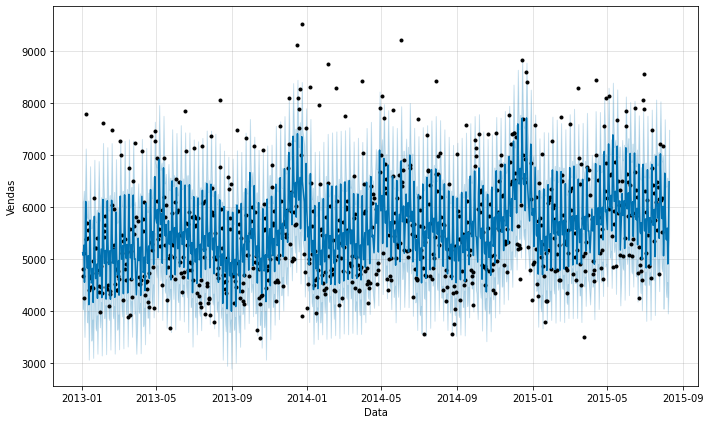

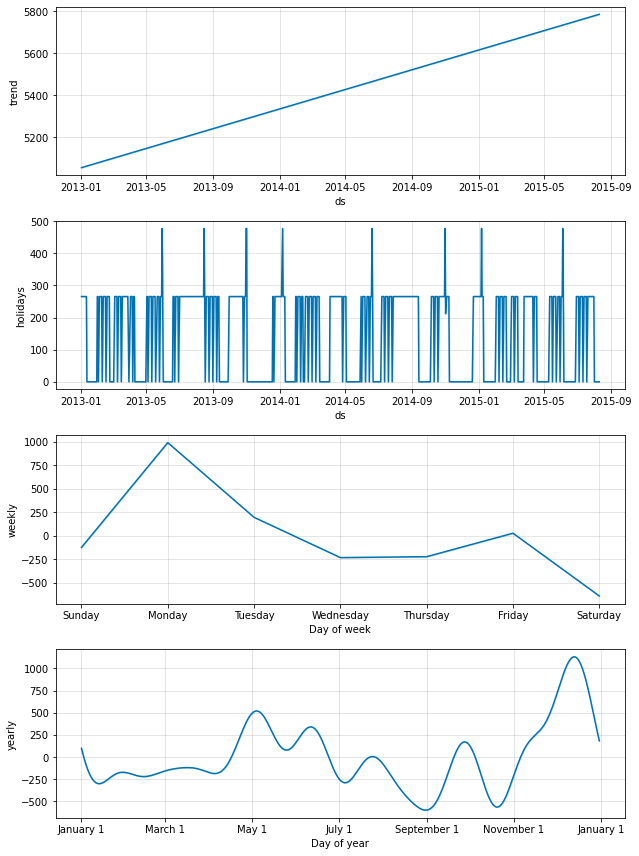

In [108]:
#Parâmetros: Loja 10 -> DF Completo -> DF de Feriados -> 10 dias de previsão
df_original, df_prediction = sales_prediction(10, sales_train_all_df, school_state_holidays, 10)

In [109]:
df_prediction.tail(10)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,holidays,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
784,2015-08-01,5778.064000,4051.262036,6175.943126,5778.064000,5778.064000,-708.914506,-708.914506,-708.914506,0.0,...,-639.095358,-639.095358,-639.095358,-69.819148,-69.819148,-69.819148,0.0,0.0,0.0,5069.149495
785,2015-08-02,5778.830992,4526.395598,6651.026460,5778.830992,5778.830992,-213.636180,-213.636180,-213.636180,0.0,...,-123.268849,-123.268849,-123.268849,-90.367330,-90.367330,-90.367330,0.0,0.0,0.0,5565.194812
786,2015-08-03,5779.597983,5626.021501,7694.918520,5779.597983,5779.597983,878.236804,878.236804,878.236804,0.0,...,990.628185,990.628185,990.628185,-112.391380,-112.391380,-112.391380,0.0,0.0,0.0,6657.834787
787,2015-08-04,5780.364974,4755.568397,6863.370848,5780.364974,5780.364974,61.213219,61.213219,61.213219,0.0,...,196.757122,196.757122,196.757122,-135.543903,-135.543903,-135.543903,0.0,0.0,0.0,5841.578193
788,2015-08-05,5781.131965,4377.883231,6399.395970,5781.131965,5781.131965,-390.617360,-390.617360,-390.617360,0.0,...,-231.127305,-231.127305,-231.127305,-159.490054,-159.490054,-159.490054,0.0,0.0,0.0,5390.514606
789,2015-08-06,5781.898956,4275.630433,6423.295551,5781.898956,5781.898956,-405.668250,-405.668250,-405.668250,0.0,...,-221.752259,-221.752259,-221.752259,-183.915991,-183.915991,-183.915991,0.0,0.0,0.0,5376.230706
790,2015-08-07,5782.665947,4566.049375,6570.919514,5782.665947,5782.665947,-180.677505,-180.677505,-180.677505,0.0,...,27.858465,27.858465,27.858465,-208.535970,-208.535970,-208.535970,0.0,0.0,0.0,5601.988442
791,2015-08-08,5783.432939,3960.837488,6007.518199,5783.432939,5783.432939,-872.193273,-872.193273,-872.193273,0.0,...,-639.095358,-639.095358,-639.095358,-233.097915,-233.097915,-233.097915,0.0,0.0,0.0,4911.239666
792,2015-08-09,5784.199930,4375.596808,6488.103260,5784.199930,5784.199930,-380.656143,-380.656143,-380.656143,0.0,...,-123.268849,-123.268849,-123.268849,-257.387294,-257.387294,-257.387294,0.0,0.0,0.0,5403.543787
793,2015-08-10,5784.966921,5508.109460,7493.966111,5784.966921,5784.966922,709.398936,709.398936,709.398936,0.0,...,990.628185,990.628185,990.628185,-281.229248,-281.229248,-281.229248,0.0,0.0,0.0,6494.365857


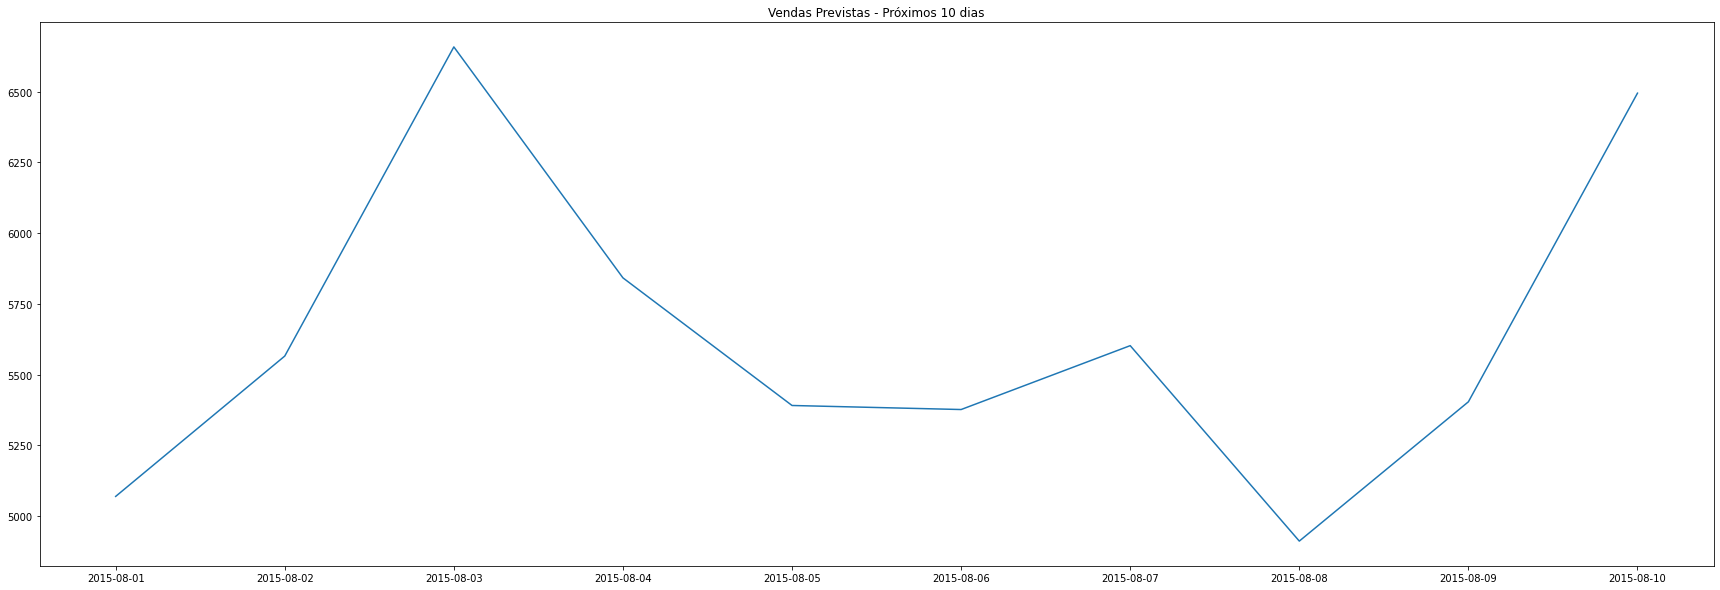

In [112]:
#Visualizando valores previstos

df_plot = df_prediction.tail(10)
plt.figure(figsize=(30,10))
plt.plot(df_plot['ds'], df_plot['yhat'])
plt.title('Vendas Previstas - Próximos 10 dias')
plt.show()